# Visualisation

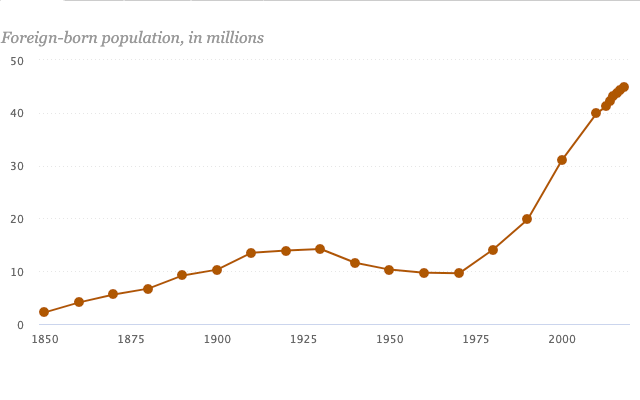

In [11]:
from PIL import Image as PILImage

path = "/Volumes/T7/smolvlm_dataset/imgs_pew/1.png"
PILImage.open(path)


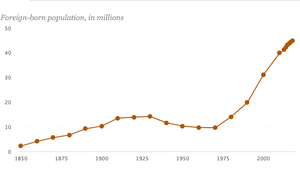
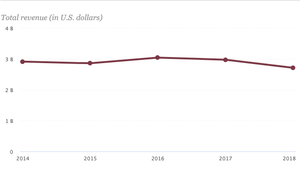
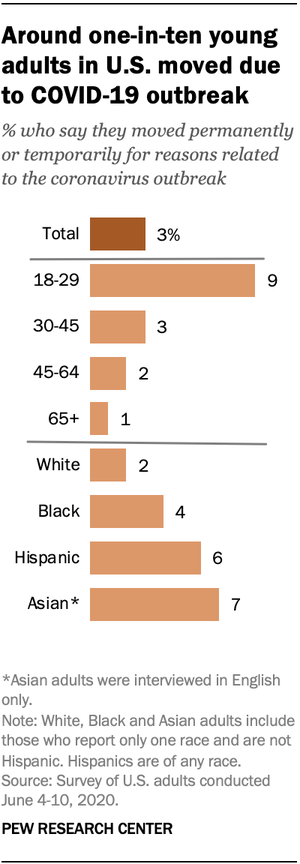
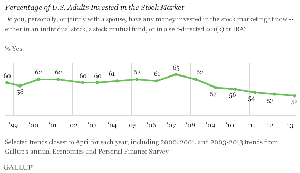
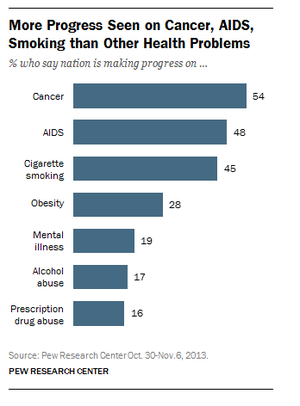
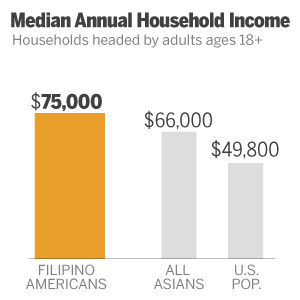

In [17]:
import os
from IPython.display import display, HTML
from PIL import Image as PILImage
import base64
from io import BytesIO

def create_image_gallery(img_dir, titles_dir, essays_dir, num_cols=2, img_width=300, images_to_show=6):
    """
    Create a gallery of images with their titles and descriptions in a Jupyter notebook.
    Uses PIL and base64 encoding to properly display images.
    """
    
    def read_text_file(filepath):
        """Helper function to read text files."""
        try:
            with open(filepath, 'r', encoding='utf-8') as f:
                return f.read().strip()
        except Exception as e:
            return f"Error reading file: {str(e)}"
    
    def get_image_base64(image_path):
        """Convert image to base64 string."""
        try:
            img = PILImage.open(image_path)
            # Resize image while maintaining aspect ratio
            aspect_ratio = img.height / img.width
            new_height = int(img_width * aspect_ratio)
            img = img.resize((img_width, new_height), PILImage.Resampling.LANCZOS)
            
            buffered = BytesIO()
            img.save(buffered, format="PNG")
            img_str = base64.b64encode(buffered.getvalue()).decode()
            return f'data:image/png;base64,{img_str}'
        except Exception as e:
            return None
    
    # Create HTML for the gallery
    html_content = '<div style="display: flex; flex-wrap: wrap; gap: 20px;">'
    
    # Get list of image files and limit to specified number
    image_files = sorted([f for f in os.listdir(img_dir) if f.endswith('.png')])[:images_to_show]
    
    # Display total number of images being shown
    total_images = len(image_files)
    html_content += f'<div style="width: 100%; margin-bottom: 20px;"><h3>Showing {total_images} images</h3></div>'
    
    for img_file in image_files:
        base_name = os.path.splitext(img_file)[0]
        title_file = os.path.join(titles_dir, f"{base_name}.txt")
        essay_file = os.path.join(essays_dir, f"{img_file}.txt")
        
        # Read title and essay
        title = read_text_file(title_file)
        essay = read_text_file(essay_file)
        
        # Get base64 encoded image
        img_path = os.path.join(img_dir, img_file)
        img_base64 = get_image_base64(img_path)
        
        if img_base64:
            # Create card for each image
            html_content += f'''
            <div style="width: {img_width}px; margin-bottom: 20px; background: #f8f9fa; padding: 15px; border-radius: 8px; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">
                <img src="{img_base64}" style="width: 100%; height: auto; border-radius: 4px;">
                <h3 style="margin: 10px 0; font-size: 16px;">{title}</h3>
                <p style="font-size: 14px; color: #666; margin: 0; max-height: 100px; overflow-y: auto;">{essay[:200]}...</p>
            </div>
            '''
        else:
            html_content += f'''
            <div style="width: {img_width}px; margin-bottom: 20px; background: #f8f9fa; padding: 15px; border-radius: 8px; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">
                <div style="width: 100%; height: 200px; background: #eee; display: flex; align-items: center; justify-content: center; border-radius: 4px;">
                    Error loading image: {img_file}
                </div>
                <h3 style="margin: 10px 0; font-size: 16px;">{title}</h3>
                <p style="font-size: 14px; color: #666; margin: 0; max-height: 100px; overflow-y: auto;">{essay[:200]}...</p>
            </div>
            '''
    
    html_content += '</div>'
    
    # Display the gallery
    display(HTML(html_content))

def create_paginated_gallery(img_dir, titles_dir, essays_dir, page=1, items_per_page=12):
    """
    Create a paginated gallery with navigation controls.
    """
    # Get total number of images
    image_files = sorted([f for f in os.listdir(img_dir) if f.endswith('.png')])
    total_images = len(image_files)
    total_pages = (total_images + items_per_page - 1) // items_per_page
    
    # Calculate start and end indices for current page
    start_idx = (page - 1) * items_per_page
    end_idx = min(start_idx + items_per_page, total_images)
    
    # Display pagination controls and info
    controls_html = f'''
    <div style="margin-bottom: 20px;">
        <span>Showing images {start_idx + 1}-{end_idx} of {total_images} (Page {page} of {total_pages})</span>
        <button onclick="document.getElementById('prev-page').value={max(1, page-1)}">Previous</button>
        <button onclick="document.getElementById('next-page').value={min(total_pages, page+1)}">Next</button>
    </div>
    '''
    
    display(HTML(controls_html))
    
    # Display current page of images
    create_image_gallery(img_dir, titles_dir, essays_dir, 
                        images_to_show=items_per_page)

# Example usage:
img_dir = '/Volumes/T7/smolvlm_dataset/imgs_pew'
titles_dir = '/Volumes/T7/smolvlm_dataset/titles_pew'
essays_dir = '/Volumes/T7/smolvlm_dataset/essays_pew'

# Test with a single image first to verify it works
def test_single_image(img_path):
    """Test function to verify image loading works"""
    try:
        img = PILImage.open(img_path)
        display(img)
        print("Successfully loaded image!")
        return True
    except Exception as e:
        print(f"Error loading image: {str(e)}")
        return False

# Uncomment to test a single image:
# test_single_image(os.path.join(img_dir, "1.png"))

# Create gallery with default 12 images
create_image_gallery(img_dir, titles_dir, essays_dir)